In [28]:
from bs4 import BeautifulSoup
import requests
from pandas.io.html import read_html
import pandas as pd
from matplotlib import pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans 


In [2]:
source=requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup=BeautifulSoup(source)


In [3]:
all_tables=soup.find_all('table')
right_table=soup.find('table', class_='wikitable sortable')


In [4]:
A=[]
B=[]
C=[]

for i,row in enumerate(right_table.findAll('tr')):
    cells = right_table.findAll('tr')[i].findAll('td')
    #states=row.findAll('th') #To store second column data
    if len(cells)==3: #Only extract table body not heading
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))


In [5]:
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [6]:
df=df.loc[df['Borough'] != 'Not assigned']
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


Text(0.5,0,'Neighborhood')

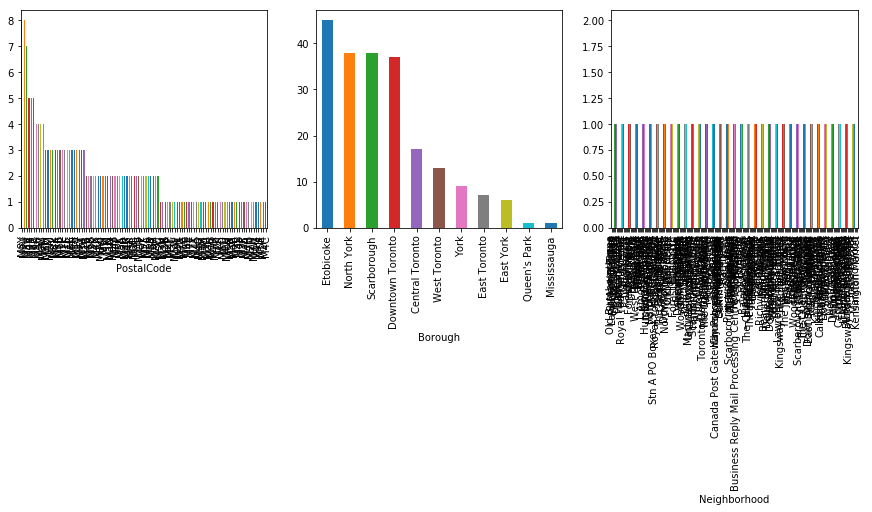

In [7]:
ax1=plt.subplot(1,3,1)
ax1=df['PostalCode'].value_counts().plot(kind='bar',figsize=(15,4))
ax1.set_xlabel('PostalCode')

ax2=plt.subplot(1,3,2)
ax2=df['Borough'].value_counts().plot(kind='bar',figsize=(15,4))
ax2.set_xlabel('Borough')

ax3=plt.subplot(1,3,3)
ax3=df['Neighborhood'].value_counts().plot(kind='bar',figsize=(15,4))
ax3.set_xlabel('Neighborhood')

In [8]:
import pandas as pd

#file='https://github.com/KobiZohar/location-project-capstone/blob/master/Geospatial_Coordinates.csv'
#postal_code=pd.read_csv('https://github.com/KobiZohar/location-project-capstone/blob/master/Geospatial_Coordinates.csv')
url = "http://cocl.us/Geospatial_data"
postal_code = pd.read_csv(url)

In [9]:
postal_code.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
df1=pd.merge(df, postal_code, left_on=  ['PostalCode'],
                   right_on= ['Postal Code'], 
                   how = 'left')

In [11]:
df1.drop('Postal Code',axis=1,inplace=True)

In [12]:
df1.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763


In [13]:
from sklearn.cluster import KMeans


In [13]:
CLIENT_ID = 'ZDIFMWFBVE5QV4NTOWZ2YWSOKZF2K5MBIKVW1QXKP3DOGCPS' # your Foursquare ID
CLIENT_SECRET = 'AQVGWP3UHSLFIKIYFRARLCWH33V5XASJZ1335EJCZZI1U0NW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZDIFMWFBVE5QV4NTOWZ2YWSOKZF2K5MBIKVW1QXKP3DOGCPS
CLIENT_SECRET:AQVGWP3UHSLFIKIYFRARLCWH33V5XASJZ1335EJCZZI1U0NW


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
LIMIT=100
toronto_venues = getNearbyVenues(names=df1['Neighborhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront
Regent Park
Lawrence Heights
Lawrence Manor
Not assigned

Islington Avenue
Rouge
Malvern
Don Mills North

Woodbine Gardens
Parkview Hill
Ryerson
Garden District

Glencairn
Cloverdale

Islington
Martin Grove

Princess Gardens
West Deane Park
Highland Creek
Rouge Hill
Port Union
Flemingdon Park
Don Mills South

Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens

Eringate

Markland Wood
Old Burnhamthorpe

Guildwood

Morningside
West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks

Woburn
Leaside
Central Bay Street

Christie

Cedarbrae
Hillcrest Village
Bathurst Manor
Downsview North

Wilson Heights
Thorncliffe Park
Adelaide
King
Richmond

Dovercourt Village
Dufferin

Scarborough Village
Fairview

Henry Farm
Oriole

Northwood Park
York University
East Toronto
Harbourfront East

Toronto Islands
Union Station
Little Portugal
Trinity
East Birchmount Park

Ionview
Kennedy Park
Bayview Village
CFB Toronto
Downsview East

The Danforth We

In [20]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [21]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
2,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,Albion Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [23]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2      Thai Restaurant  0.04
3           Steakhouse  0.04
4  American Restaurant  0.04


----Agincourt----
            venue  freq
0    Skating Rink  0.25
1  Clothing Store  0.25
2  Breakfast Spot  0.25
3          Lounge  0.25
4   Movie Theater  0.00


----Agincourt North----
                venue  freq
0                Park  0.67
1          Playground  0.33
2  Miscellaneous Shop  0.00
3       Movie Theater  0.00
4               Motel  0.00


----Albion Gardens
----
                 venue  freq
0          Pizza Place   0.2
1        Grocery Store   0.2
2             Pharmacy   0.1
3          Coffee Shop   0.1
4  Fried Chicken Joint   0.1


----Alderwood----
                venue  freq
0         Pizza Place  0.18
1            Pharmacy  0.09
2        Skating Rink  0.09
3  Athletics & Sports  0.09
4        Dance Studio  0.09


----Bathurst Manor----
                 venue  freq
0        

                 venue  freq
0          Coffee Shop  0.11
1  Fried Chicken Joint  0.06
2        Shopping Mall  0.06
3     Sushi Restaurant  0.06
4            Gift Shop  0.06


----Downsview Northwest
----
                  venue  freq
0    Athletics & Sports  0.25
1          Liquor Store  0.25
2  Gym / Fitness Center  0.25
3         Grocery Store  0.25
4    Miscellaneous Shop  0.00


----Downsview West----
                venue  freq
0       Grocery Store  0.25
1                Park  0.25
2       Shopping Mall  0.25
3                Bank  0.25
4  Miscellaneous Shop  0.00


----Dufferin
----
            venue  freq
0        Pharmacy  0.10
1     Supermarket  0.10
2          Bakery  0.10
3  Discount Store  0.05
4     Pizza Place  0.05


----East Birchmount Park
----
                venue  freq
0      Discount Store  0.29
1       Train Station  0.14
2         Bus Station  0.14
3  Chinese Restaurant  0.14
4    Department Store  0.14


----East Toronto----
               venue  freq
0       

                  venue  freq
0    Chinese Restaurant  0.15
1  Fast Food Restaurant  0.15
2           Pizza Place  0.08
3              Pharmacy  0.08
4        Breakfast Spot  0.08


----Lawrence Heights----
                    venue  freq
0          Clothing Store  0.36
1  Furniture / Home Store  0.14
2                Boutique  0.07
3       Accessories Store  0.07
4               Gift Shop  0.07


----Lawrence Manor----
                    venue  freq
0          Clothing Store  0.36
1  Furniture / Home Store  0.14
2                Boutique  0.07
3       Accessories Store  0.07
4               Gift Shop  0.07


----Lawrence Manor East
----
                  venue  freq
0      Sushi Restaurant  0.08
1  Fast Food Restaurant  0.08
2           Coffee Shop  0.08
3    Italian Restaurant  0.08
4              Pharmacy  0.04


----Lawrence Park----
                venue  freq
0            Bus Line  0.25
1  Dim Sum Restaurant  0.25
2                Park  0.25
3         Swim School  0.25
4        

                 venue  freq
0       Baseball Field   1.0
1               Market   0.0
2        Movie Theater   0.0
3                Motel   0.0
4  Monument / Landmark   0.0


----Royal York South West
----
                  venue  freq
0         Tanning Salon  0.07
1  Fast Food Restaurant  0.07
2           Flower Shop  0.07
3       Supplement Shop  0.07
4        Sandwich Place  0.07


----Runnymede----
                venue  freq
0         Pizza Place  0.08
1                Café  0.08
2         Coffee Shop  0.08
3  Italian Restaurant  0.05
4    Sushi Restaurant  0.05


----Runnymede
----
           venue  freq
0    Pizza Place  0.25
1  Grocery Store  0.25
2         Bakery  0.25
3       Bus Line  0.25
4  Movie Theater  0.00


----Ryerson----
                       venue  freq
0                Coffee Shop  0.09
1             Clothing Store  0.09
2                       Café  0.04
3  Middle Eastern Restaurant  0.03
4             Cosmetics Shop  0.03


----Scarborough Town Centre----
    

           venue  freq
0           Bank   1.0
1    Yoga Studio   0.0
2         Market   0.0
3  Movie Theater   0.0
4          Motel   0.0


----West Hill----
                 venue  freq
0          Pizza Place  0.17
1  Rental Car Location  0.17
2       Medical Center  0.17
3   Mexican Restaurant  0.17
4       Breakfast Spot  0.17


----Westmount----
                       venue  freq
0                Pizza Place   0.2
1  Middle Eastern Restaurant   0.2
2         Chinese Restaurant   0.2
3                Coffee Shop   0.2
4             Sandwich Place   0.2


----Weston----
                venue  freq
0                Park   1.0
1         Yoga Studio   0.0
2  Miscellaneous Shop   0.0
3       Movie Theater   0.0
4               Motel   0.0


----Wexford----
               venue  freq
0        Auto Garage  0.17
1  Accessories Store  0.17
2     Breakfast Spot  0.17
3             Bakery  0.17
4      Shopping Mall  0.17


----Wexford Heights----
                    venue  freq
0       Indian 

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Café,American Restaurant,Thai Restaurant,Steakhouse,Asian Restaurant,Bakery,Hotel,Restaurant,Gym
1,Agincourt,Breakfast Spot,Lounge,Skating Rink,Clothing Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
2,Agincourt North,Park,Playground,Women's Store,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,Albion Gardens,Pizza Place,Grocery Store,Pharmacy,Coffee Shop,Beer Store,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Construction & Landscaping,Convenience Store
4,Alderwood,Pizza Place,Pharmacy,Pool,Skating Rink,Sandwich Place,Dance Studio,Pub,Athletics & Sports,Coffee Shop,Gym


In [29]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 2, 2, 2, 2, 2, 2, 2])